# Pearson correlation coefficient

Is a popular way to assess the strength of the linear relationship between variables.

In [1]:
from itertools import compress
import numpy as np
import matplotlib.pyplot as plt

Suppose we have to arrays of values:

$X=\left\{ x_i \right\}$, $Y=\left\{y_i\right\}, i =\overline{1,n}$.

The next cell generates and displays $X$ and $Y$ that we'll use in this page.

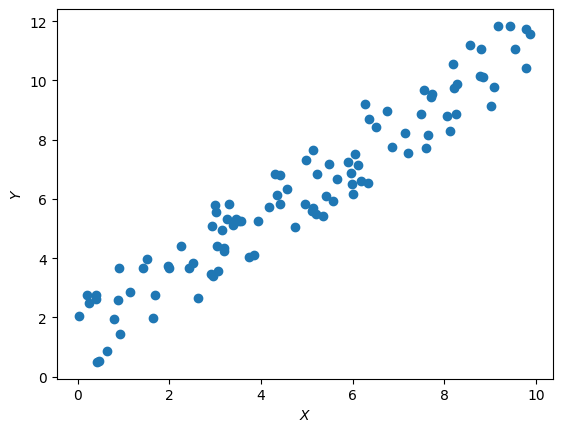

In [12]:
np.random.seed(10)

sample_size = 100
X = np.random.uniform(0, 10, sample_size)
Y = X + np.random.uniform(0, 3, sample_size)


# we will regularly need some characteristics 
# of the sample, so it is rational to calculate 
# them at once
X_mean = X.mean()
Y_mean = Y.mean()
X_min, X_max = X.min(), X.max()
Y_min, Y_max = Y.min(), Y.max()

plt.scatter(X, Y)
plt.xlabel("$X$"); plt.ylabel("$Y$")
plt.show()

In the introduced notations, the prisson correlation coefficient can be written as:

$$r_{X,Y}=\frac{cov(X,Y)}{\sigma_X \sigma_Y}$$

Where:

- $cov(X,Y)=\sum_{i=1}^n (x_i - \overline{X})(y_i - \overline{Y})$ - covariation of $X$ and $Y$;
- $\sigma_X = \sqrt{\sum_{i=1}^n(x_i - \overline{X})^2}$ - standart deviation of $X$;
- $\sigma_Y = \sqrt{\sum_{i=1}^n(y_i - \overline{Y})^2}$ - standart deviation of $Y$.

## Covariation

Is a value in numerator of the Pirosn correlation coefficient. It can be written as:

$$cov=\sum_{i=1}^n(x_i-\overline{X})(y_i -  \overline{Y})$$

Consider each component of the summa more carefully: $(x_i-\overline{X})(y_i -  \overline{Y})$.

The key feature here is this: 

- $sign[x_i-\overline{X}] = sign[y_i-\overline{Y}] \Rightarrow  (x_i-\overline{X})(y_i -  \overline{Y}) > 0$;
- $sign[x_i-\overline{X}] \neq sign[y_i-\overline{Y}] \Rightarrow  (x_i-\overline{X})(y_i -  \overline{Y}) < 0$.

In the following plots are shown and idea:

In [3]:
def get_ticks_with_average(ticks, labels, tick, label):
    '''
    Lets you add new ticks and labels
    without overlapping with existing 
    labels on the chart
    '''
    available_ticks_mask = (np.abs(ticks - tick) > 0.5)
    ticks = ticks[available_ticks_mask]
    labels = list(compress(labels, available_ticks_mask))
    X_ticks = {
        **dict(zip(ticks, [l.get_text() for l in labels])),
        tick : label
    }
    return dict(
        ticks=list(X_ticks.keys()), 
        labels=list(X_ticks.values())
    )

def plot_mean_ticks():
    
    plt.xticks(
        **get_ticks_with_average(
            *plt.xticks(), 
            tick=X_mean,
            label="$\overline{X}$",
        )
    )
    plt.yticks(
        **get_ticks_with_average(
            *plt.yticks(),
            tick=Y_mean,
            label="$\overline{Y}$"
        )
    )

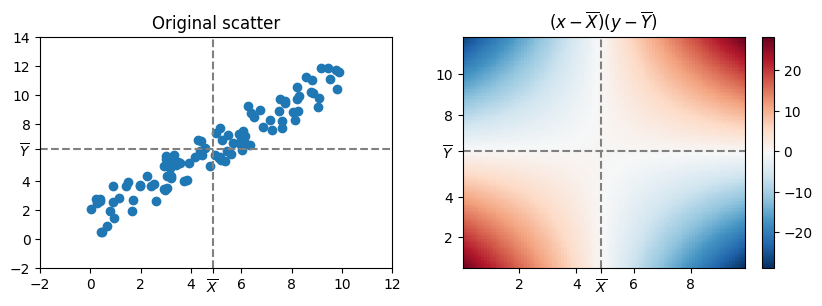

In [11]:
plt.figure(figsize=[10, 3])

plt.subplot(121)
plt.title("Original scatter")
plt.scatter(X,Y)
plt.axvline(X_mean, color="grey", linestyle="--")
plt.axhline(Y_mean, color="grey", linestyle="--")
plot_mean_ticks()

plt.subplot(122)
plt.title("$(x-\overline{X})(y-\overline{Y})$")
x_space = np.linspace(X_min, X_max, 100)
y_space = np.linspace(Y_min, Y_max, 100)
x_mesh, y_mesh = np.meshgrid(x_space, y_space)
z_mesh = (x_mesh - X_mean)*(y_mesh - Y_mean)
plt.pcolormesh(x_mesh, y_mesh, z_mesh, cmap="RdBu_r")
plt.colorbar()
plt.axvline(X_mean, color="grey", linestyle="--")
plt.axhline(Y_mean, color="grey", linestyle="--")
plot_mean_ticks()
plt.xlim(X_min, X_max)
plt.ylim(Y_min, Y_max)


plt.show()

If the point is in the right-top or left-bottom quadrants, the value of the covariation will increase, if it is in the left-top and left-bottom quadrants, the value of the covariation will decrease.